In [1]:
import numpy as np
import matplotlib.pyplot as plt
from classes.minicluster import AxionMiniclusterNFW
from classes.particles import Particles
from classes.ns import NeutronStar
from scripts.orbits import evolve_AC
from scripts.basic_functions import mag_vector

In [2]:
M_MC = 1
MC = AxionMiniclusterNFW(M_MC, Particles.axionmass)
MC.center, MC.vcenter = [0.2*MC.radius_trunc(), 1e16, 0.], [0, -200., 0]

c:\Users\gsali\Dropbox\PC (2)\Documents\GitHub\axionns\classes\minicluster.py:35: RuntimeWarning: divide by zero encountered in true_divide
  return self.rho_s()/(distances/self.rs()*np.power(1 + distances/self.rs(), 2))*np.heaviside(self.radius_trunc() - distances, 1)


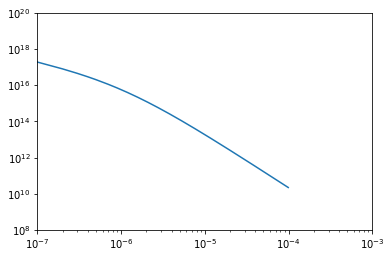

In [5]:
km_to_pc = 3.086*1e13
rs_plot = np.linspace(0, MC.radius_trunc(), 1000)
positions_plot = np.array([np.array([r_plot, 0, 0]) + MC.center for r_plot in rs_plot])
plt.plot(rs_plot/km_to_pc, np.power(km_to_pc,3)*MC.density_profile(positions_plot))
plt.xscale("log")
plt.yscale("log")
plt.xlim(left = 1e-7, right = 1e-3);
plt.ylim(top = 1e20, bottom = 1e8);

In [6]:
MC.encl_mass([np.array([MC.radius_trunc(),0,0]) + np.array(MC.center)])[0]

0.9999999999999971

c:\Users\gsali\Dropbox\PC (2)\Documents\GitHub\axionns\classes\minicluster.py:53: RuntimeWarning: divide by zero encountered in true_divide
  return -4e-10*np.pi*G_N*self.rho_s()*np.power(self.rs(), 3)/distances*np.log((distances + self.rs())/self.rs())
c:\Users\gsali\Dropbox\PC (2)\Documents\GitHub\axionns\classes\minicluster.py:53: RuntimeWarning: invalid value encountered in multiply
  return -4e-10*np.pi*G_N*self.rho_s()*np.power(self.rs(), 3)/distances*np.log((distances + self.rs())/self.rs())


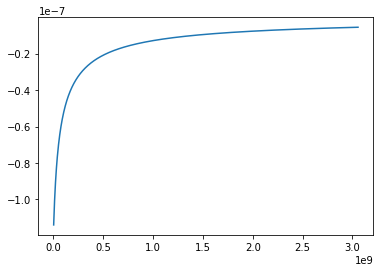

In [9]:
fake_positions = np.array([[r_plot,0,0] for r_plot in rs_plot])
plt.plot(rs_plot, MC.gravitational_potential(fake_positions + MC.center));

c:\Users\gsali\Dropbox\PC (2)\Documents\GitHub\axionns\classes\minicluster.py:66: RuntimeWarning: invalid value encountered in true_divide
  return 1e-5*np.sqrt(G_N*self.encl_mass(positions)/mag_vector(positions_from_center))


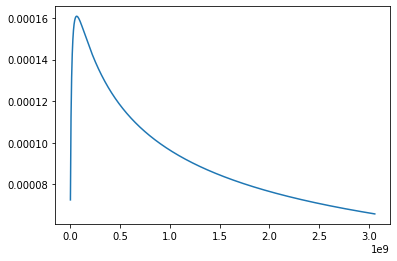

In [10]:
plt.plot(rs_plot, MC.circ_v(fake_positions + MC.center))

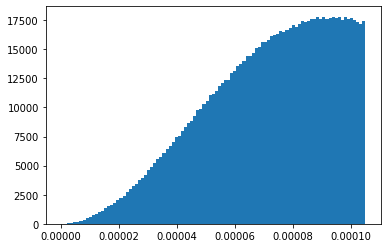

In [11]:
fake_position = np.array([MC.radius_trunc(),0, 0]) + MC.center
mag_vs = mag_vector(MC.draw_vs(fake_position, multiplier=1000000))
plt.hist(mag_vs, bins = np.linspace(0, MC.v_esc(fake_position)[0], 100));

In [12]:
NS = NeutronStar(1, 10)
bmax = MC.max_impact_param(NS)

In [13]:
evolve_AC(MC, NS)

In [14]:
nparticles = 10000
positions0, velocities0 = MC.draw_particles(nparticles, 1.2*MC.radius_trunc())

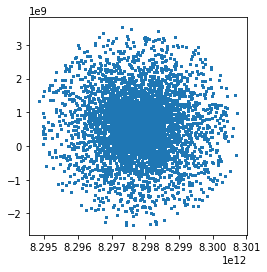

In [15]:
plt.scatter(positions0.T[1], positions0.T[0], s = 1)
ax = plt.gca()
ax.set_aspect('equal')

In [16]:
nparticles = 1000
bmax += 3*mag_vector(MC.center)/mag_vector(MC.vcenter)*MC.circ_v([np.array([MC.radius_trunc(),0,0]) + MC.center])[0]
positions, velocities = MC.draw_particles(nparticles, bmax)

In [17]:
positions

array([[-6.06767409e+06,  8.29801369e+12, -3.41704094e+06],
       [-6.06767409e+06,  8.29801369e+12, -3.41704094e+06],
       [-6.06767409e+06,  8.29801369e+12, -3.41704094e+06],
       ...,
       [ 4.10106720e+06,  8.29836511e+12,  7.10841989e+06],
       [ 4.10106720e+06,  8.29836511e+12,  7.10841989e+06],
       [ 4.10106720e+06,  8.29836511e+12,  7.10841989e+06]])

In [18]:
velocities

array([[ 1.17432919e-04, -2.00000105e+02, -1.14156305e-04],
       [-4.53071131e-07, -1.99999985e+02, -1.15989105e-04],
       [-7.47233812e-05, -2.00000038e+02,  6.55693666e-05],
       ...,
       [-6.74276039e-05, -2.00000075e+02, -3.36050730e-05],
       [-5.79799694e-05, -2.00000091e+02, -2.42347038e-05],
       [ 9.43737385e-06, -2.00000016e+02, -9.48084390e-06]])

In [21]:
particles = Particles([], [])
rcmax = NS.conversion_radius_max(Particles.axionmass)
while particles.nparticles < 1000:
    positions, velocities = MC.draw_particles(1000, bmax, multiplier=1000)
    particles.add_particles([np.array([0.]*len(positions))], positions, velocities, np.array([[None, None, None]]*len(positions)))
    particles.remove_particles_far(rcmax, NS)
    print(particles.nparticles)

10
17
33
48
59
65
73
87
97
108
126
135
146
157
174
185
197
211
221
234
248
260
275
296
313
323
332
348
360
368
375
388
402
415
427
441
456
467
477
491
507
519
527
538
552
566
572
581


KeyboardInterrupt: 

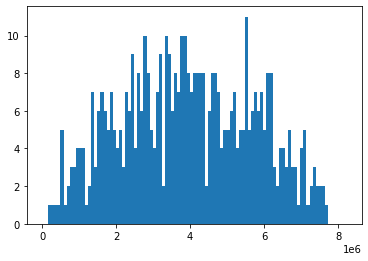

In [22]:
bs = np.sort(np.array(list(set([mag_vector([position[0], position[2]]) for position in particles.positions]))))
plt.hist(bs, bins = np.linspace(0, bmax, 100));

In [23]:
bmax

8223068.812304426

In [25]:
MC.rs()/1e6

30.57004887909954

In [27]:
MC.radius_trunc()/1e6

3057.004887909954